# Introduction

This notebook presents how to train CIFAR-10 dataset with [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) model. The main purpose is to practice implementing the past state-of-the-art deep convolutional architecture in TensorFlow so that I could improve my fast prototyping ability. 

### Section 1, 2, 5, 6, 7
- These sections' contents are related to preparing dataset, training, and testing procedures. These processes are borrowed from my previous notebook, so I won't explain about them much in here. You can find much more detailed explanation [HERE, MY GITHUB REPO](https://github.com/deep-diver/CIFAR10-img-classification-tensorflow)

### Section 3, 4
- These sections are what I want to focus on this notebook. The section 3 is about AlexNet's architecture based on the original paper. The section 4 is about defining loss function, optimizer, and so on. I will give a brief description about mapping between the paper and the actual implementation in TensorFlow.

## 1. CIFAR-10 Dataset Download

In [1]:
import pickle
import alexnet
import cifar10_utils

In [2]:
cifar10_dataset_folder_path = 'cifar-10-batches-py'

cifar10_utils.download(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:14, 11.4MB/s]                              


## 2. Preprocess the dataset

In [3]:
cifar10_utils.preprocess_and_save_data(cifar10_dataset_folder_path)

## 3. AlexNet Model Architecture

![AlexNet Architecture](./figure1.png)

Some more detailed mapping between paper and TensorFlow code can be found [HERE](https://github.com/deep-diver/AlexNet/blob/master/AlexNet.pdf)

In [4]:
epochs = 18
learning_rate = 0.00005
batch_size = 64

In [5]:
input, label, cost, optimizer, accuracy = alexnet.single_gpu_build_model(learning_rate, 'cifar10')

## 6. Training

In [6]:
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))
tmpValidFeatures = cifar10_utils.convert_to_imagenet_size(valid_features[:3000])

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [7]:
save_model_path = './image_classification'

alexnet.start_train(epochs,
                batch_size,
                tmpValidFeatures,
                valid_labels,
                input, label, cost, optimizer, accuracy,
                save_model_path)

global_variables_initializer...
starting training ... 


/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Epoch  1, CIFAR-10 Batch 1: Loss Average 3.947212  Validation Accuracy 0.109200
Epoch  1, CIFAR-10 Batch 2: Loss Average 2.783466  Validation Accuracy 0.104800
Epoch  1, CIFAR-10 Batch 3: Loss Average 2.351599  Validation Accuracy 0.155600
Epoch  1, CIFAR-10 Batch 4: Loss Average 2.206978  Validation Accuracy 0.192200
Epoch  1, CIFAR-10 Batch 5: Loss Average 2.148307  Validation Accuracy 0.190200
Epoch  2, CIFAR-10 Batch 1: Loss Average 2.103067  Validation Accuracy 0.194000
Epoch  2, CIFAR-10 Batch 2: Loss Average 2.069854  Validation Accuracy 0.197600
Epoch  2, CIFAR-10 Batch 3: Loss Average 2.030778  Validation Accuracy 0.220400
Epoch  2, CIFAR-10 Batch 4: Loss Average 1.993128  Validation Accuracy 0.244800
Epoch  2, CIFAR-10 Batch 5: Loss Average 1.969666  Validation Accuracy 0.248000
Epoch  3, CIFAR-10 Batch 1: Loss Average 1.949876  Validation Accuracy 0.251400
Epoch  3, CIFAR-10 Batch 2: Loss Average 1.924272  Validation Accuracy 0.269200
Epoch  3, CIFAR-10 Batch 3: Loss Average

## 7. Testing

In [8]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(features, labels, predictions):
    n_classes = 10
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(10, 2, figsize=(12,24))

    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    
    for image_i, (feature, label_id, prediction) in enumerate(zip(features, label_ids, predictions)):
        correct_name = label_names[label_id]
        pred_name = label_names[np.argmax(prediction)]
        
        is_match = 'False'        
        
        if np.argmax(prediction) == label_id:
            is_match = 'True'
            
        predictions_array = []
        pred_names = []
        
        for index, pred_value in enumerate(prediction):
            tmp_pred_name = label_names[index]
            predictions_array.append({tmp_pred_name : pred_value})
            pred_names.append(tmp_pred_name)
        
        print('[{}] ground truth: {}, predicted result: {} | {}'.format(image_i, correct_name, pred_name, is_match))
        print('\t- {}\n'.format(predictions_array))
        
        axs[image_i][0].imshow(feature)
        axs[image_i][0].set_title(pred_name)
        axs[image_i][0].set_axis_off()
        
        axs[image_i][1].barh(ind + margin, prediction, width)
        axs[image_i][1].set_yticks(ind + margin)
        axs[image_i][1].set_yticklabels(pred_names)
        
    plt.tight_layout()

In [12]:
import skimage
import numpy as np

test_features, test_labels = pickle.load(open('preprocess_testing.p', mode='rb'))
tmpFeatures = []

for feature in test_features:
    tmpFeature = skimage.transform.resize(feature, (224, 224), mode='constant')
    tmpFeatures.append(tmpFeature)

tmpFeatures = np.asarray(tmpFeatures)

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6310708598726115



/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0] ground truth: deer, predicted result: horse | False
	- [{'airplane': 4.7219473e-06}, {'automobile': 1.8860402e-06}, {'bird': 0.00021143408}, {'cat': 0.000119157594}, {'deer': 0.25631896}, {'dog': 0.00078393915}, {'frog': 6.953202e-06}, {'horse': 0.74254763}, {'ship': 9.932005e-07}, {'truck': 4.3079394e-06}]

[1] ground truth: cat, predicted result: cat | True
	- [{'airplane': 0.0066373884}, {'automobile': 0.00065057946}, {'bird': 0.1960735}, {'cat': 0.5549793}, {'deer': 0.044466905}, {'dog': 0.015318376}, {'frog': 0.16247573}, {'horse': 0.009941244}, {'ship': 0.0072564096}, {'truck': 0.0022005073}]

[2] ground truth: automobile, predicted result: automobile | True
	- [{'airplane': 4.4265184e-05}, {'automobile': 0.99702746}, {'bird': 2.8064629e-05}, {'cat': 8.212934e-06}, {'deer': 2.726276e-06}, {'dog': 6.36897e-06}, {'frog': 2.1838545e-05}, {'horse': 4.8851216e-06}, {'ship': 2.400623e-05}, {'truck': 0.0028322802}]

[3] ground truth: airplane, predicted result: airplane | True
	- [{

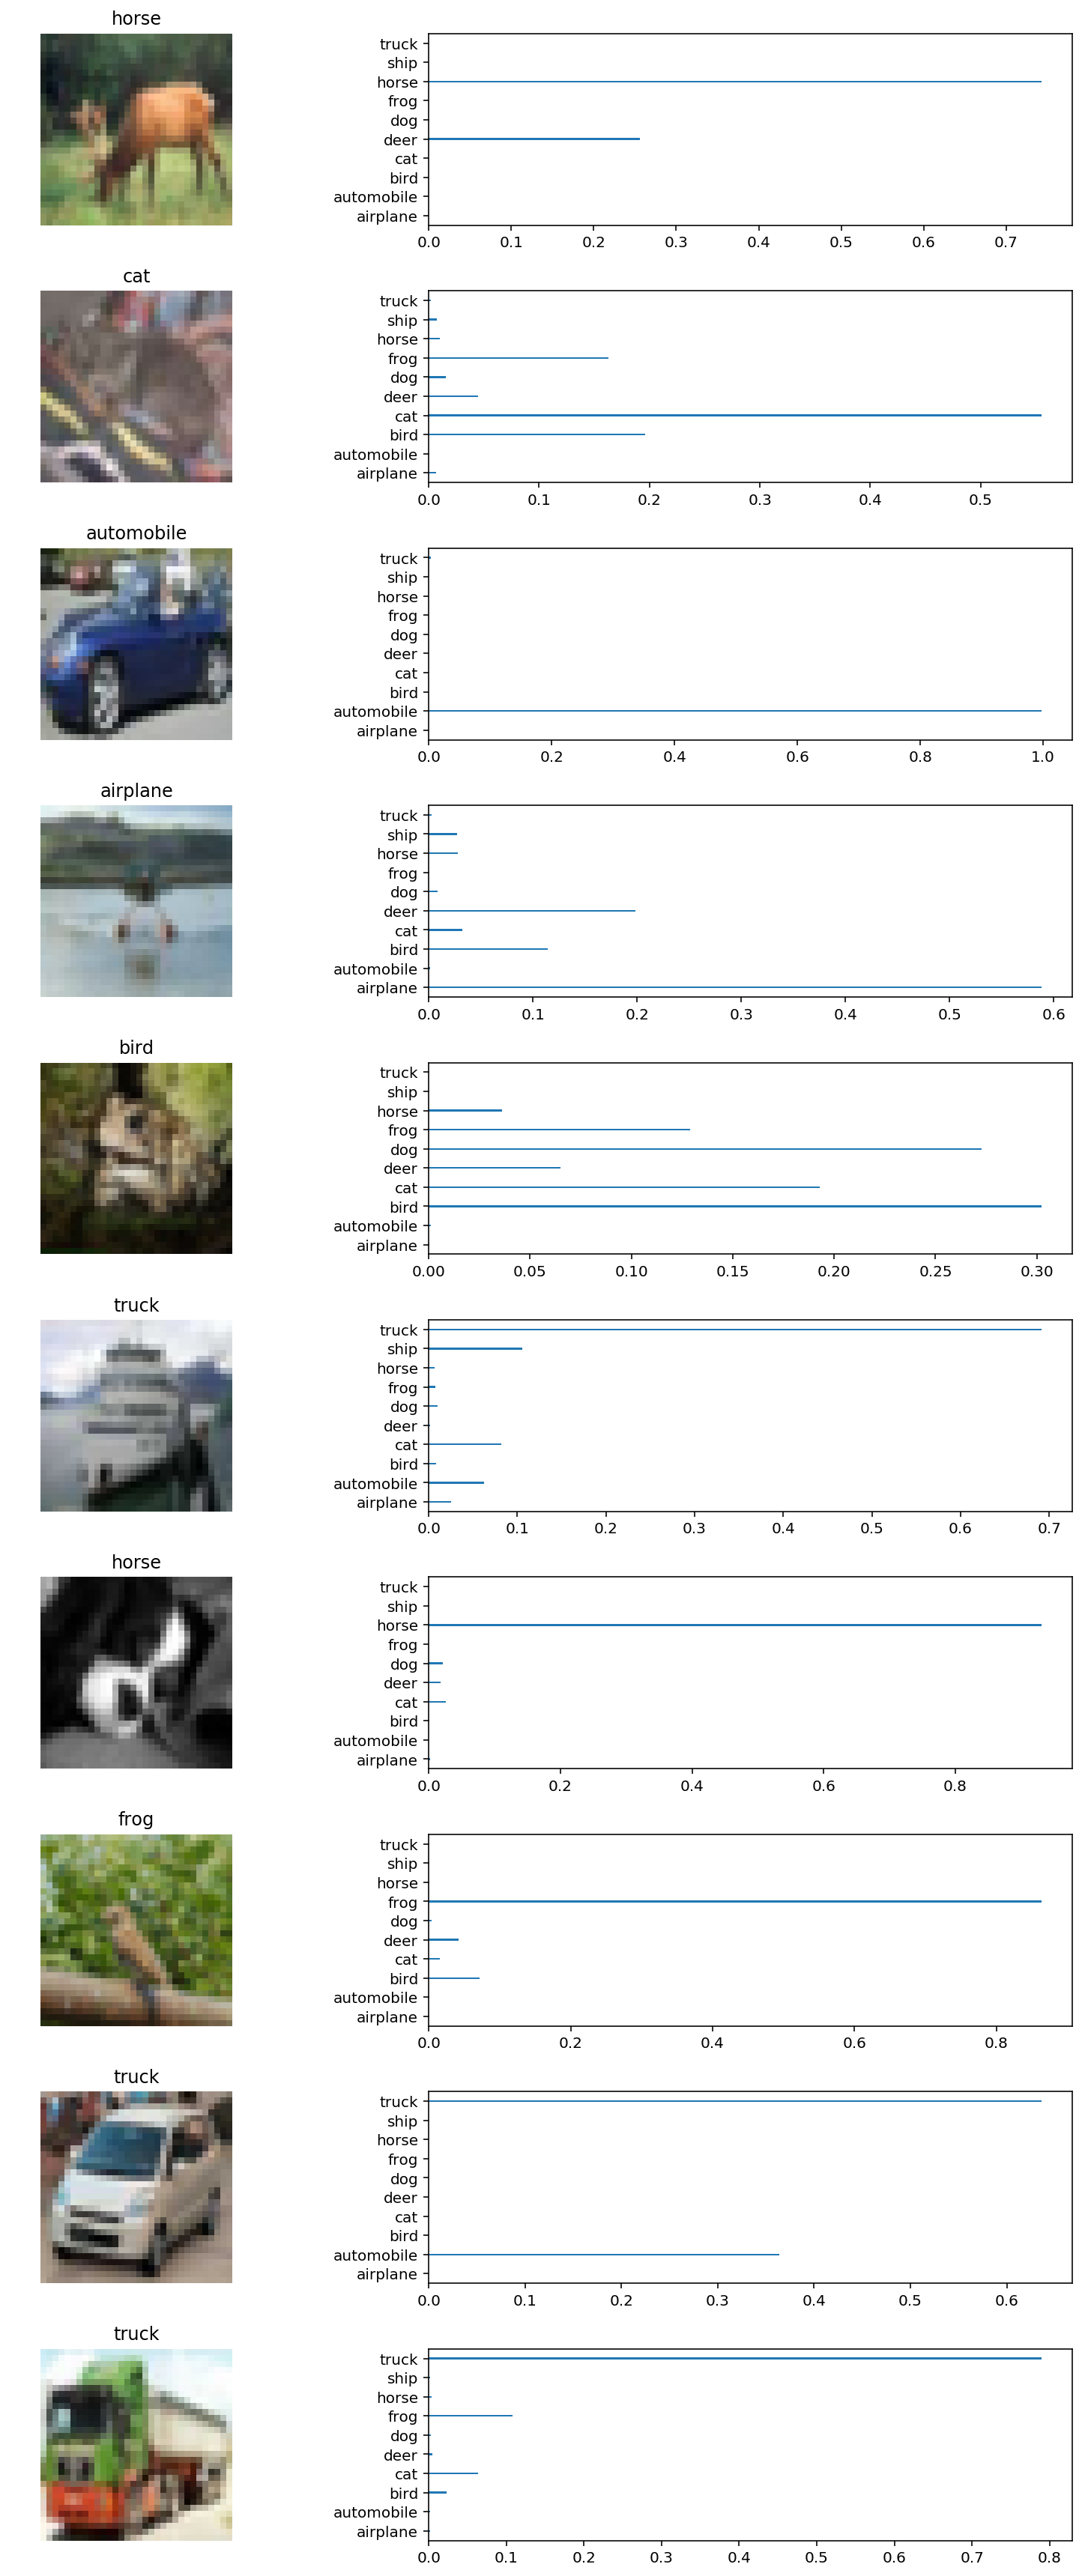

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import random
import tensorflow as tf

save_model_path = './image_classification'
batch_size = 64
n_samples = 10
top_n_predictions = 5

def test_model(tmpFeatures):
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        loaded_x = loaded_graph.get_tensor_by_name('input:0')
        loaded_y = loaded_graph.get_tensor_by_name('label:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        for train_feature_batch, train_label_batch in cifar10_utils.batch_features_labels(tmpFeatures, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        
        tmpTestFeatures = []
    
        for feature in random_test_features:
            tmpFeature = skimage.transform.resize(feature, (224, 224), mode='constant')
            tmpTestFeatures.append(tmpFeature)
           
        random_test_predictions = sess.run(
            tf.nn.softmax(loaded_logits),
            feed_dict={loaded_x: tmpTestFeatures, loaded_y: random_test_labels})
        
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

test_model(tmpFeatures)